In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
#loading the dataset
train_data = pd.read_csv("C:/Users/R/Desktop/LIVE ENVIRONMENT/final-year-project-Flight-Price-Machine-Learning-Prediction-Model/Algeria_Data_Train.CSV")

In [3]:
#
pd.set_option('display.max_columns', None)

In [4]:
#knowing the shape of the dataset
train_data.shape

(11079, 18)

In [5]:
train_data.head()

,s,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,GRU,Brazil,MUC,Germany,Boeing 787|Airbus A320,multi,[LATAM| Lufthansa],LA702|LA702,7/28/2022 23:00,7/30/2022 08:15,1695,1,1892.0,USD,3577000.0,933000.0,283%,4/29/2022 17:52
1,GRU,Brazil,MUC,Germany,Airbus A330|Airbus A321|Airbus A320,multi,[Iberia| Lufthansa],IB6824|IB6824|IB6824,7/28/2022 14:20,7/29/2022 11:20,960,2,1899.0,USD,4014000.0,933000.0,330%,4/29/2022 17:52
2,GRU,Brazil,MUC,Germany,Boeing 787|Boeing 787,AC,[Air Canada],AC91|AC91,7/28/2022 21:20,7/30/2022 07:45,1765,1,2261.0,USD,1925000.0,933000.0,106%,4/29/2022 17:52
3,GRU,Brazil,MUC,Germany,Boeing 787|Airbus A350,multi,[United| Lufthansa],UA844|UA844,7/28/2022 22:20,7/30/2022 07:20,1680,1,2330.0,USD,1288000.0,933000.0,38%,4/29/2022 17:52
4,GRU,Brazil,MUC,Germany,Airbus A350|Airbus A320neo,BA,[British Airways],BA246|BA246,7/28/2022 16:05,7/29/2022 11:50,885,1,2490.0,USD,2888000.0,933000.0,209%,4/29/2022 17:52


In [6]:
train_data.drop(["s", "dest_airport_code","currency", "aircraft_type", "airline_number","flight_number", "avg_co2_emission_for_this_route", "co2_percentage", "co2_emissions", "scan_date"], axis = 1, inplace = True)

In [7]:
train_data.head()

,from_country,dest_country,airline_name,departure_time,arrival_time,duration,stops,price
0,Brazil,Germany,[LATAM| Lufthansa],7/28/2022 23:00,7/30/2022 08:15,1695,1,1892.0
1,Brazil,Germany,[Iberia| Lufthansa],7/28/2022 14:20,7/29/2022 11:20,960,2,1899.0
2,Brazil,Germany,[Air Canada],7/28/2022 21:20,7/30/2022 07:45,1765,1,2261.0
3,Brazil,Germany,[United| Lufthansa],7/28/2022 22:20,7/30/2022 07:20,1680,1,2330.0
4,Brazil,Germany,[British Airways],7/28/2022 16:05,7/29/2022 11:50,885,1,2490.0


In [8]:
#checking which is an interger, string, float
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11079 entries, 0 to 11078
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   from_country    11079 non-null  object 
 1   dest_country    11079 non-null  object 
 2   airline_name    11079 non-null  object 
 3   departure_time  11079 non-null  object 
 4   arrival_time    11079 non-null  object 
 5   duration        11079 non-null  int64  
 6   stops           11079 non-null  int64  
 7   price           11077 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 692.6+ KB


In [9]:
#changing the price column from float to interger
train_data['price'].fillna(0, inplace=True)

In [10]:
train_data['price'].replace([np.inf, -np.inf], 0, inplace=True)

In [11]:
train_data['price'] = train_data['price'].astype('int64')

In [12]:
#checking which is an interger, string, float
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11079 entries, 0 to 11078
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_country    11079 non-null  object
 1   dest_country    11079 non-null  object
 2   airline_name    11079 non-null  object
 3   departure_time  11079 non-null  object
 4   arrival_time    11079 non-null  object
 5   duration        11079 non-null  int64 
 6   stops           11079 non-null  int64 
 7   price           11079 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 692.6+ KB


In [13]:
train_data['duration'].value_counts()

duration
2355    64
1660    54
1995    51
1295    47
790     47
        ..
1562     1
1764     1
1934     1
2774     1
4263     1
Name: count, Length: 1468, dtype: int64

In [14]:
train_data.shape

(11079, 8)

In [15]:
#data cleaning or removing empty cells 
train_data.dropna(inplace = True)

In [16]:
train_data.shape

(11079, 8)

In [17]:
#checking for empty cells
train_data.isnull().sum()

from_country      0
dest_country      0
airline_name      0
departure_time    0
arrival_time      0
duration          0
stops             0
price             0
dtype: int64

In [18]:
#separating departure column into date and time
train_data['departure_time']
train_data['departure_time'] = pd.to_datetime(train_data['departure_time'])

In [19]:
train_data['Ddate'] = train_data['departure_time'].dt.date
train_data['Dtime'] = train_data['departure_time'].dt.time

In [20]:
train_data['Dhours'] = train_data['departure_time'].dt.hour
train_data['Dminutes'] = train_data['departure_time'].dt.minute


In [21]:
train_data['departure_day'] = pd.to_datetime(train_data.Ddate, format ="%d/%m/%y").dt.day

In [22]:
train_data ['departure_month'] = pd.to_datetime(train_data.Ddate, format ="%d/%m/%y").dt.month

In [23]:
train_data.drop(["Ddate"], axis = 1, inplace = True)

In [24]:
train_data.drop(["Dtime"], axis = 1, inplace = True)

In [25]:
train_data.drop(["departure_time"], axis = 1, inplace = True)

In [26]:
#separating the arrival column into date and time.
train_data['arrival_time']
train_data['arrival_time'] = pd.to_datetime(train_data['arrival_time'])

In [27]:
train_data['Rdate'] = train_data['arrival_time'].dt.date
train_data['Rtime'] = train_data['arrival_time'].dt.time

In [28]:
train_data['arrival_day'] = pd.to_datetime(train_data.Rdate, format ="%d/%m/%y").dt.day

In [29]:
train_data['arrival_month'] = pd.to_datetime(train_data.Rdate, format ="%d/%m/%y").dt.month

In [30]:
#splitting arrival time
train_data['Ahours'] = train_data['arrival_time'].dt.hour
train_data['Aminutes'] = train_data['arrival_time'].dt.minute


In [31]:
train_data.drop(["arrival_time"], axis = 1, inplace = True)

In [32]:
train_data.drop(["Rdate"], axis = 1, inplace = True)

In [33]:
train_data.drop(["Rtime"], axis = 1, inplace = True)

In [34]:
train_data["airline_name"].value_counts()

airline_name
[LATAM| Lufthansa]     3691
[Iberia| Lufthansa]    2462
[Air Canada]           2462
[United| Lufthansa]    1232
[British Airways]      1232
Name: count, dtype: int64

In [35]:
#handling categorical data

#norminal data--------------onehotencoding
#ordinal data---------------labelencoding


In [36]:
train_data["airline_name"].value_counts()

airline_name
[LATAM| Lufthansa]     3691
[Iberia| Lufthansa]    2462
[Air Canada]           2462
[United| Lufthansa]    1232
[British Airways]      1232
Name: count, dtype: int64

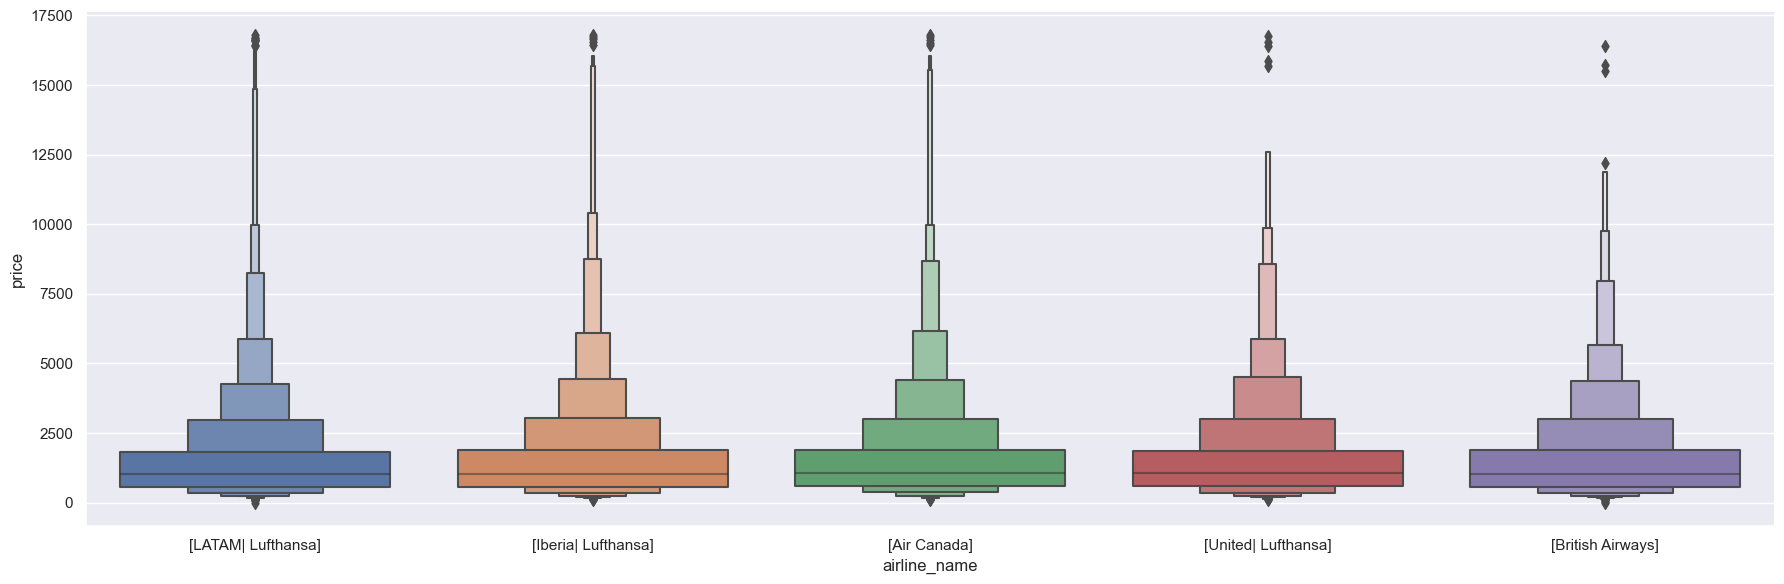

In [37]:
#the graph shows the airline with  the highest price

#airline vs price
sns.catplot(y = "price", x="airline_name", data = train_data.sort_values("price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [38]:
# airline onehotencoding

airline_name = train_data[["airline_name"]]

airline_name = pd.get_dummies(airline_name, drop_first=True, dtype=bool)

airline_name = airline_name.astype(int)

airline_name.head()

,airline_name_[British Airways],airline_name_[Iberia| Lufthansa],airline_name_[LATAM| Lufthansa],airline_name_[United| Lufthansa]
0,0,0,1,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,1
4,1,0,0,0


In [39]:
train_data["from_country"].value_counts()

from_country
Denmark     2042
Canada      1849
Columbia    1315
Brazil      1167
India       1112
Greece      1112
China       1101
Dublin       892
Chile        489
Name: count, dtype: int64

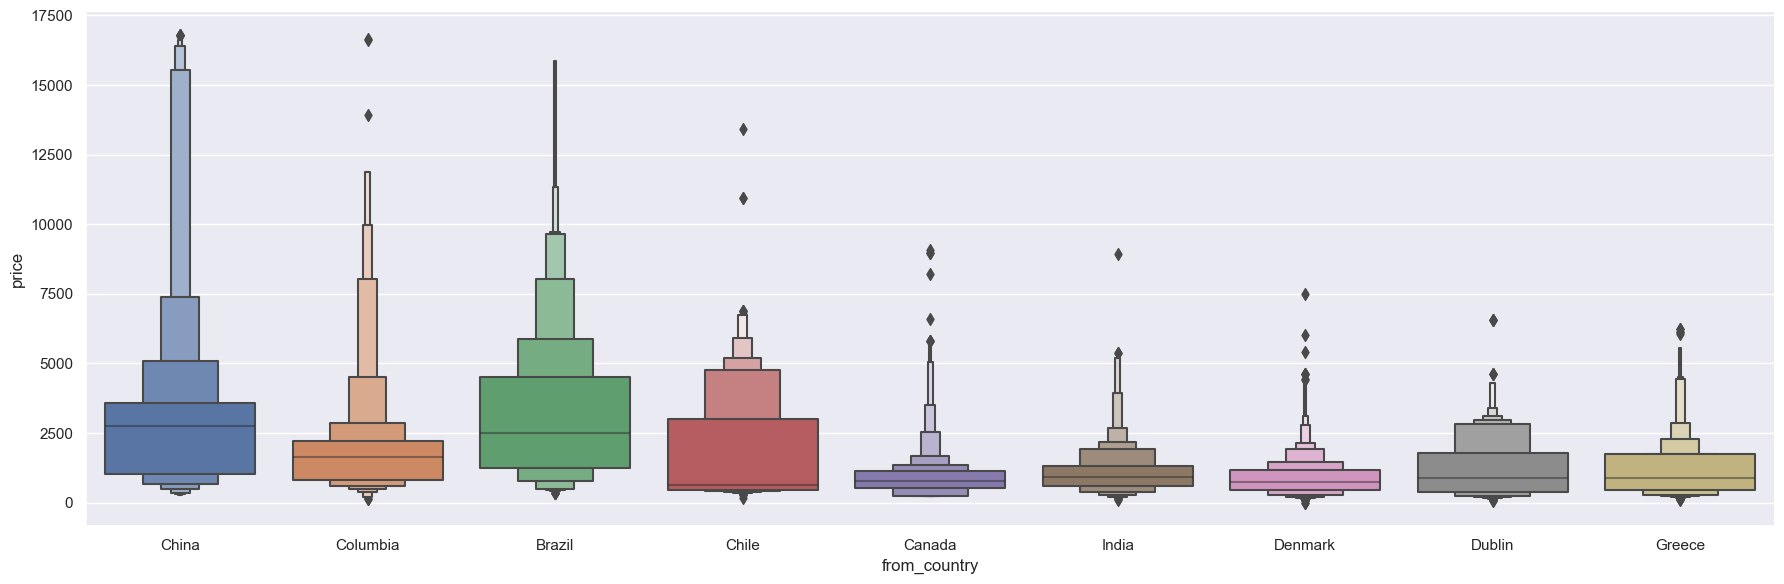

In [40]:
#source vs price

sns.catplot(y = "price", x="from_country", data = train_data.sort_values("price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [41]:
#one hotencoding for source

from_country = train_data[["from_country"]]

from_country = pd.get_dummies(from_country, drop_first = True)

from_country = from_country.astype(int)

from_country.head()

,from_country_Canada,from_country_Chile,from_country_China,from_country_Columbia,from_country_Denmark,from_country_Dublin,from_country_Greece,from_country_India
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [42]:
train_data["dest_country"].value_counts()

dest_country
United States     1200
Brazil            1178
Australia         1111
Egypt              954
France             771
Argentina          576
Kenya              561
India              482
Dublin             461
Thailand           423
United Kingdom     413
Denmark            380
Panama             350
Turkey             322
Germany            322
China              275
Zurich             246
Vietnam            170
Columbia           165
Austria            162
Spain              154
Russia              96
Morocco             73
Taiwan              66
Portugal            65
Norway              44
Philippines         40
Belgium             13
Mexico               6
Name: count, dtype: int64

In [43]:
#onehotencoding for destination

dest_country = train_data[["dest_country"]]

dest_country= pd.get_dummies(dest_country, drop_first = True)

dest_country = dest_country.astype(int)

dest_country.head()

,dest_country_Australia,dest_country_Austria,dest_country_Belgium,dest_country_Brazil,dest_country_China,dest_country_Columbia,dest_country_Denmark,dest_country_Dublin,dest_country_Egypt,dest_country_France,dest_country_Germany,dest_country_India,dest_country_Kenya,dest_country_Mexico,dest_country_Morocco,dest_country_Norway,dest_country_Panama,dest_country_Philippines,dest_country_Portugal,dest_country_Russia,dest_country_Spain,dest_country_Taiwan,dest_country_Thailand,dest_country_Turkey,dest_country_United Kingdom,dest_country_United States,dest_country_Vietnam,dest_country_Zurich
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
train_data["stops"].value_counts()

stops
2    4829
1    4803
3    1171
0     240
4      36
Name: count, dtype: int64

In [45]:
train_data.replace({ "0 stop": 0, "1 stop": 1,"2 stop": 2, "3 stop": 3, "4 stop":4 }, inplace = True)

In [46]:
#concating the dataframe -----train_data, airline, source, destination

data_train = pd.concat([train_data, airline_name, from_country, dest_country], axis = 1)

In [47]:
data_train.head()

,from_country,dest_country,airline_name,duration,stops,price,Dhours,Dminutes,departure_day,departure_month,arrival_day,arrival_month,Ahours,Aminutes,airline_name_[British Airways],airline_name_[Iberia| Lufthansa],airline_name_[LATAM| Lufthansa],airline_name_[United| Lufthansa],from_country_Canada,from_country_Chile,from_country_China,from_country_Columbia,from_country_Denmark,from_country_Dublin,from_country_Greece,from_country_India,dest_country_Australia,dest_country_Austria,dest_country_Belgium,dest_country_Brazil,dest_country_China,dest_country_Columbia,dest_country_Denmark,dest_country_Dublin,dest_country_Egypt,dest_country_France,dest_country_Germany,dest_country_India,dest_country_Kenya,dest_country_Mexico,dest_country_Morocco,dest_country_Norway,dest_country_Panama,dest_country_Philippines,dest_country_Portugal,dest_country_Russia,dest_country_Spain,dest_country_Taiwan,dest_country_Thailand,dest_country_Turkey,dest_country_United Kingdom,dest_country_United States,dest_country_Vietnam,dest_country_Zurich
0,Brazil,Germany,[LATAM| Lufthansa],1695,1,1892,23,0,28,7,30,7,8,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Brazil,Germany,[Iberia| Lufthansa],960,2,1899,14,20,28,7,29,7,11,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Brazil,Germany,[Air Canada],1765,1,2261,21,20,28,7,30,7,7,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Brazil,Germany,[United| Lufthansa],1680,1,2330,22,20,28,7,30,7,7,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Brazil,Germany,[British Airways],885,1,2490,16,5,28,7,29,7,11,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
data_train.drop(["airline_name", "from_country", "dest_country"], axis = 1, inplace = True)

In [49]:
data_train.head()

,duration,stops,price,Dhours,Dminutes,departure_day,departure_month,arrival_day,arrival_month,Ahours,Aminutes,airline_name_[British Airways],airline_name_[Iberia| Lufthansa],airline_name_[LATAM| Lufthansa],airline_name_[United| Lufthansa],from_country_Canada,from_country_Chile,from_country_China,from_country_Columbia,from_country_Denmark,from_country_Dublin,from_country_Greece,from_country_India,dest_country_Australia,dest_country_Austria,dest_country_Belgium,dest_country_Brazil,dest_country_China,dest_country_Columbia,dest_country_Denmark,dest_country_Dublin,dest_country_Egypt,dest_country_France,dest_country_Germany,dest_country_India,dest_country_Kenya,dest_country_Mexico,dest_country_Morocco,dest_country_Norway,dest_country_Panama,dest_country_Philippines,dest_country_Portugal,dest_country_Russia,dest_country_Spain,dest_country_Taiwan,dest_country_Thailand,dest_country_Turkey,dest_country_United Kingdom,dest_country_United States,dest_country_Vietnam,dest_country_Zurich
0,1695,1,1892,23,0,28,7,30,7,8,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,960,2,1899,14,20,28,7,29,7,11,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1765,1,2261,21,20,28,7,30,7,7,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1680,1,2330,22,20,28,7,30,7,7,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,885,1,2490,16,5,28,7,29,7,11,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
(data_train)

,duration,stops,price,Dhours,Dminutes,departure_day,departure_month,arrival_day,arrival_month,Ahours,Aminutes,airline_name_[British Airways],airline_name_[Iberia| Lufthansa],airline_name_[LATAM| Lufthansa],airline_name_[United| Lufthansa],from_country_Canada,from_country_Chile,from_country_China,from_country_Columbia,from_country_Denmark,from_country_Dublin,from_country_Greece,from_country_India,dest_country_Australia,dest_country_Austria,dest_country_Belgium,dest_country_Brazil,dest_country_China,dest_country_Columbia,dest_country_Denmark,dest_country_Dublin,dest_country_Egypt,dest_country_France,dest_country_Germany,dest_country_India,dest_country_Kenya,dest_country_Mexico,dest_country_Morocco,dest_country_Norway,dest_country_Panama,dest_country_Philippines,dest_country_Portugal,dest_country_Russia,dest_country_Spain,dest_country_Taiwan,dest_country_Thailand,dest_country_Turkey,dest_country_United Kingdom,dest_country_United States,dest_country_Vietnam,dest_country_Zurich
0,1695,1,1892,23,0,28,7,30,7,8,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,960,2,1899,14,20,28,7,29,7,11,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1765,1,2261,21,20,28,7,30,7,7,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1680,1,2330,22,20,28,7,30,7,7,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,885,1,2490,16,5,28,7,29,7,11,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11074,1140,2,1746,13,10,30,5,31,5,0,10,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11075,965,1,390,20,20,3,5,4,5,11,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11076,1141,2,1746,13,10,30,5,31,5,0,11,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11077,400,2,409,6,0,3,5,3,5,11,40,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
data_train.describe()

,duration,stops,price,Dhours,Dminutes,departure_day,departure_month,arrival_day,arrival_month,Ahours,Aminutes,airline_name_[British Airways],airline_name_[Iberia| Lufthansa],airline_name_[LATAM| Lufthansa],airline_name_[United| Lufthansa],from_country_Canada,from_country_Chile,from_country_China,from_country_Columbia,from_country_Denmark,from_country_Dublin,from_country_Greece,from_country_India,dest_country_Australia,dest_country_Austria,dest_country_Belgium,dest_country_Brazil,dest_country_China,dest_country_Columbia,dest_country_Denmark,dest_country_Dublin,dest_country_Egypt,dest_country_France,dest_country_Germany,dest_country_India,dest_country_Kenya,dest_country_Mexico,dest_country_Morocco,dest_country_Norway,dest_country_Panama,dest_country_Philippines,dest_country_Portugal,dest_country_Russia,dest_country_Spain,dest_country_Taiwan,dest_country_Thailand,dest_country_Turkey,dest_country_United Kingdom,dest_country_United States,dest_country_Vietnam,dest_country_Zurich
count,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.00000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000
mean,1458.857478,1.635346,1610.262569,12.977074,27.291452,16.544363,5.596353,15.635436,5.661070,12.786533,27.004603,0.111201,0.222222,0.333153,0.111201,0.166892,0.044138,0.099377,0.118693,0.184313,0.080513,0.100370,0.100370,0.100280,0.014622,0.001173,0.106327,0.024822,0.014893,0.034299,0.041610,0.086109,0.069591,0.029064,0.043506,0.050636,0.000542,0.006589,0.003971,0.031591,0.003610,0.005867,0.008665,0.013900,0.005957,0.03818,0.029064,0.037278,0.108313,0.015344,0.022204
std,763.242114,0.711294,1870.708836,5.853944,18.032597,11.422091,1.139918,11.587071,1.115561,6.242006,17.309505,0.314396,0.415758,0.471362,0.314396,0.372897,0.205410,0.299181,0.323442,0.387756,0.272098,0.300506,0.300506,0.300386,0.120041,0.034236,0.308270,0.155589,0.121130,0.182005,0.199706,0.280537,0.254468,0.167994,0.204002,0.219264,0.023266,0.080909,0.062897,0.174917,0.059981,0.076374,0.092686,0.117082,0.076956,0.19164,0.167994,0.189450,0.310789,0.122924,0.147354
min,105.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,885.000000,1.000000,569.000000,8.000000,11.000000,6.000000,5.000000,4.000000,5.000000,8.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1365.000000,2.000000,1044.000000,13.000000,29.000000,15.000000,5.000000,15.000000,5.000000,13.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,

In [52]:
data_train.shape

(11079, 51)

In [53]:
#TEST DATA

In [54]:
test_data = pd.read_csv("C:/Users/R/Desktop/LIVE ENVIRONMENT/final-year-project-Flight-Price-Machine-Learning-Prediction-Model/Algeria_Test_Set.csv")

In [55]:
test_data.head()

,source_country,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[LATAM| Lufthansa],AF1491|AF1491|AF1491|AF1491,4/30/2022 14:30,5/1/2022 10:15,1425,3,1279,USD,1320000.0,1320000.0,0%,4/29/2022 17:52
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Iberia| Lufthansa],AF1491|AF1491|AF1491|AF1491,4/30/2022 14:30,5/1/2022 10:15,1425,3,1279,USD,1195000.0,1320000.0,-9%,4/29/2022 17:52
2,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air Canada],AF1855|AF1855|AF1855|AF1855,4/30/2022 12:45,5/1/2022 10:15,1530,3,1284,USD,1248000.0,1320000.0,-5%,4/29/2022 17:52
3,ALG,Algeria,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[United| Lufthansa],AF1491|AF1491|AF1491|AF1491,4/30/2022 14:30,5/1/2022 10:15,1425,3,1290,USD,1347000.0,1320000.0,2%,4/29/2022 17:52
4,ALG,Algeria,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,[British Airways],LH1317|LH1317|LH1317,4/30/2022 12:35,5/1/2022 10:15,1540,2,1347,USD,1381000.0,1320000.0,4%,4/29/2022 17:52


In [56]:
#preprocessing

print("Test data Info")
print("_"*75)
print(test_data.info())

print()
print()

print("Null values: ")
print("_"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())



#drop unwanted columns
test_data.drop(["source_country", "dest_airport_code","currency", "price","aircraft_type", "airline_number","flight_number", "avg_co2_emission_for_this_route", "co2_percentage", "co2_emissions", "scan_date"], axis = 1, inplace = True)


#separating departure column into date and time
test_data['departure_time']
test_data['departure_time'] = pd.to_datetime(test_data['departure_time'])

test_data['Ddate'] = test_data['departure_time'].dt.date
test_data['Dtime'] = test_data['departure_time'].dt.time

test_data['Dhours'] = test_data['departure_time'].dt.hour
test_data['Dminutes'] = test_data['departure_time'].dt.minute


test_data['departure_day'] = pd.to_datetime(test_data.Ddate, format ="%d/%m/%y").dt.day
test_data['departure_month'] = pd.to_datetime(test_data.Ddate, format ="%d/%m/%y").dt.month

test_data.drop(["Ddate"], axis = 1, inplace = True)
test_data.drop(["Dtime"], axis = 1, inplace = True)
test_data.drop(["departure_time"], axis = 1, inplace = True)





#separating the arrival column into date and time.
test_data['arrival_time']
test_data['arrival_time'] = pd.to_datetime(test_data['arrival_time'])

test_data['Rdate'] = test_data['arrival_time'].dt.date
test_data['Rtime'] = test_data['arrival_time'].dt.time

test_data['arrival_day'] = pd.to_datetime(test_data.Rdate, format ="%d/%m/%y").dt.day
test_data['arrival_month'] = pd.to_datetime(test_data.Rdate, format ="%d/%m/%y").dt.month

#splitting arrival time
test_data['Ahours'] = test_data['arrival_time'].dt.hour
test_data['Aminutes'] = test_data['arrival_time'].dt.minute


test_data.drop(["Rdate"], axis = 1, inplace = True)
test_data.drop(["Rtime"], axis = 1, inplace = True)
test_data.drop(["arrival_time"], axis = 1, inplace = True)








# airline onehotencoding

airline_name = test_data[["airline_name"]]

#Airline = pd.get_dummies(Airline, drop_first = True)

airline_name = pd.get_dummies(airline_name, drop_first=True, dtype=bool)

airline_name = airline_name.astype(int)

airline_name.head()




#one hotencoding for source

from_country = test_data[["from_country"]]

from_country = pd.get_dummies(from_country, drop_first = True)

from_country = from_country.astype(int)

from_country.head()




#onehotencoding for destination

dest_country = test_data[["dest_country"]]

dest_country= pd.get_dummies(dest_country, drop_first = True)

dest_country = dest_country.astype(int)

dest_country.head()



#concating the dataframe -----train_data, airline, source, destination

data_test = pd.concat([test_data, airline_name, from_country, dest_country], axis = 1)







Test data Info
___________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2599 entries, 0 to 2598
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_country                   2599 non-null   object 
 1   from_country                     2599 non-null   object 
 2   dest_airport_code                2599 non-null   object 
 3   dest_country                     2599 non-null   object 
 4   aircraft_type                    2597 non-null   object 
 5   airline_number                   2599 non-null   object 
 6   airline_name                     2599 non-null   object 
 7   flight_number                    2599 non-null   object 
 8   departure_time                   2599 non-null   object 
 9   arrival_time                     2599 non-null   object 
 10  duration                         2599 non-null   int6

In [57]:
data_test.head()

,from_country,dest_country,airline_name,duration,stops,Dhours,Dminutes,departure_day,departure_month,arrival_day,arrival_month,Ahours,Aminutes,airline_name_[British Airways],airline_name_[Iberia| Lufthansa],airline_name_[LATAM| Lufthansa],airline_name_[United| Lufthansa],dest_country_Austria,dest_country_Belgium,dest_country_Canada,dest_country_Denmark
0,Algeria,Argentina,[LATAM| Lufthansa],1425,3,14,30,30,4,1,5,10,15,0,0,1,0,0,0,0,0
1,Algeria,Argentina,[Iberia| Lufthansa],1425,3,14,30,30,4,1,5,10,15,0,1,0,0,0,0,0,0
2,Algeria,Argentina,[Air Canada],1530,3,12,45,30,4,1,5,10,15,0,0,0,0,0,0,0,0
3,Algeria,Argentina,[United| Lufthansa],1425,3,14,30,30,4,1,5,10,15,0,0,0,1,0,0,0,0
4,Algeria,Argentina,[British Airways],1540,2,12,35,30,4,1,5,10,15,1,0,0,0,0,0,0,0


In [58]:
data_test.shape

(1598, 21)

In [59]:
data_test.drop(["airline_name", "from_country", "dest_country"], axis = 1, inplace = True)

In [60]:
data_test.head()

,duration,stops,Dhours,Dminutes,departure_day,departure_month,arrival_day,arrival_month,Ahours,Aminutes,airline_name_[British Airways],airline_name_[Iberia| Lufthansa],airline_name_[LATAM| Lufthansa],airline_name_[United| Lufthansa],dest_country_Austria,dest_country_Belgium,dest_country_Canada,dest_country_Denmark
0,1425,3,14,30,30,4,1,5,10,15,0,0,1,0,0,0,0,0
1,1425,3,14,30,30,4,1,5,10,15,0,1,0,0,0,0,0,0
2,1530,3,12,45,30,4,1,5,10,15,0,0,0,0,0,0,0,0
3,1425,3,14,30,30,4,1,5,10,15,0,0,0,1,0,0,0,0
4,1540,2,12,35,30,4,1,5,10,15,1,0,0,0,0,0,0,0


In [61]:
data_test.shape

(1598, 18)

In [62]:
data_train.columns

Index(['duration', 'stops', 'price', 'Dhours', 'Dminutes', 'departure_day',
       'departure_month', 'arrival_day', 'arrival_month', 'Ahours', 'Aminutes',
       'airline_name_[British Airways]', 'airline_name_[Iberia| Lufthansa]',
       'airline_name_[LATAM| Lufthansa]', 'airline_name_[United| Lufthansa]',
       'from_country_Canada', 'from_country_Chile', 'from_country_China',
       'from_country_Columbia', 'from_country_Denmark', 'from_country_Dublin',
       'from_country_Greece', 'from_country_India', 'dest_country_Australia',
       'dest_country_Austria', 'dest_country_Belgium', 'dest_country_Brazil',
       'dest_country_China', 'dest_country_Columbia', 'dest_country_Denmark',
       'dest_country_Dublin', 'dest_country_Egypt', 'dest_country_France',
       'dest_country_Germany', 'dest_country_India', 'dest_country_Kenya',
       'dest_country_Mexico', 'dest_country_Morocco', 'dest_country_Norway',
       'dest_country_Panama', 'dest_country_Philippines',
       'dest_coun

In [63]:
X = data_train.loc[:, ['duration', 'stops', 'price', 'Dhours', 'Dminutes', 'departure_day',
       'departure_month', 'arrival_day', 'arrival_month', 'Ahours', 'Aminutes',
       'airline_name_[British Airways]', 'airline_name_[Iberia| Lufthansa]',
       'airline_name_[LATAM| Lufthansa]', 'airline_name_[United| Lufthansa]',
       'from_country_Canada', 'from_country_Chile', 'from_country_China',
       'from_country_Columbia', 'from_country_Denmark', 'from_country_Dublin',
       'from_country_Greece', 'from_country_India', 'dest_country_Australia',
       'dest_country_Austria', 'dest_country_Belgium', 'dest_country_Brazil',
       'dest_country_China', 'dest_country_Columbia', 'dest_country_Denmark',
       'dest_country_Dublin', 'dest_country_Egypt', 'dest_country_France',
       'dest_country_Germany', 'dest_country_India', 'dest_country_Kenya',
       'dest_country_Mexico', 'dest_country_Morocco', 'dest_country_Norway',
       'dest_country_Panama', 'dest_country_Philippines',
       'dest_country_Portugal', 'dest_country_Russia', 'dest_country_Spain',
       'dest_country_Taiwan', 'dest_country_Thailand', 'dest_country_Turkey',
       'dest_country_United Kingdom', 'dest_country_United States',
       'dest_country_Vietnam', 'dest_country_Zurich']]

X.head ()

,duration,stops,price,Dhours,Dminutes,departure_day,departure_month,arrival_day,arrival_month,Ahours,Aminutes,airline_name_[British Airways],airline_name_[Iberia| Lufthansa],airline_name_[LATAM| Lufthansa],airline_name_[United| Lufthansa],from_country_Canada,from_country_Chile,from_country_China,from_country_Columbia,from_country_Denmark,from_country_Dublin,from_country_Greece,from_country_India,dest_country_Australia,dest_country_Austria,dest_country_Belgium,dest_country_Brazil,dest_country_China,dest_country_Columbia,dest_country_Denmark,dest_country_Dublin,dest_country_Egypt,dest_country_France,dest_country_Germany,dest_country_India,dest_country_Kenya,dest_country_Mexico,dest_country_Morocco,dest_country_Norway,dest_country_Panama,dest_country_Philippines,dest_country_Portugal,dest_country_Russia,dest_country_Spain,dest_country_Taiwan,dest_country_Thailand,dest_country_Turkey,dest_country_United Kingdom,dest_country_United States,dest_country_Vietnam,dest_country_Zurich
0,1695,1,1892,23,0,28,7,30,7,8,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,960,2,1899,14,20,28,7,29,7,11,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1765,1,2261,21,20,28,7,30,7,7,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1680,1,2330,22,20,28,7,30,7,7,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,885,1,2490,16,5,28,7,29,7,11,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
y = data_train.iloc[:, 2]
y.head()

0    1892
1    1899
2    2261
3    2330
4    2490
Name: price, dtype: int64

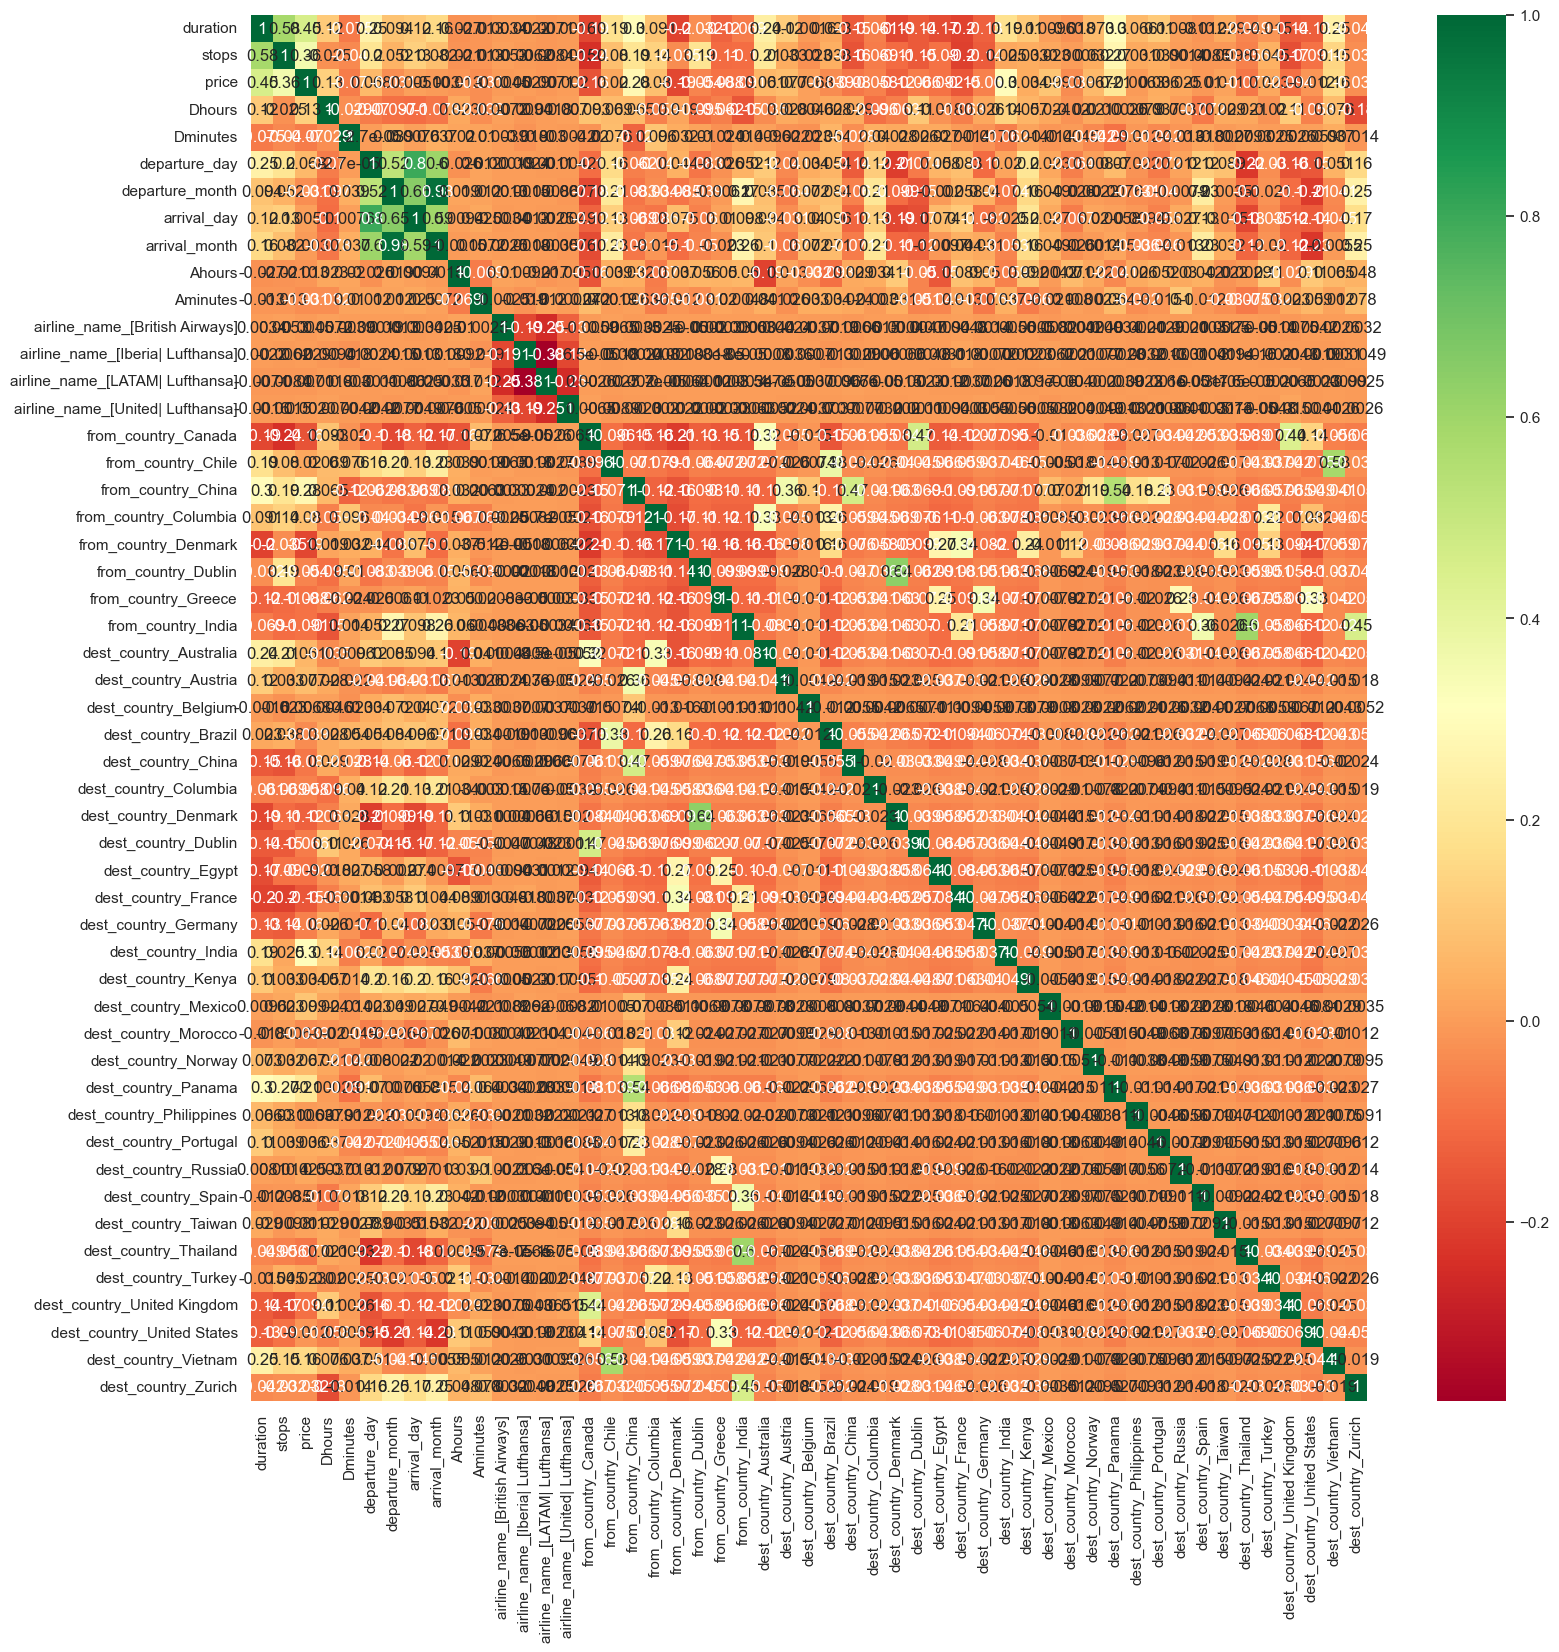

In [65]:
#finds correlation between independent and dependent Attributes.
#
plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot =True, cmap = "RdYlGn")

plt.show()

In [66]:
#
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[8.62911987e-03 9.85403897e-03 9.50404357e-01 3.90775619e-04
 5.53067589e-05 2.36741045e-04 9.71762595e-05 4.46518975e-04
 1.22846030e-04 1.90025421e-04 1.21050304e-04 1.56006776e-06
 2.26278871e-06 2.81653944e-06 4.22142114e-07 6.04570133e-06
 1.44263497e-05 2.76930051e-03 3.77371340e-04 7.39708691e-06
 1.17416691e-04 9.26168532e-05 2.16526400e-05 6.43112297e-04
 4.46591329e-05 2.06756657e-07 5.05149835e-04 6.20616252e-06
 1.43123429e-07 4.02463666e-07 3.06367562e-05 2.14514538e-05
 1.05454382e-05 2.80586087e-04 1.73075827e-02 2.43752146e-05
 2.83139870e-05 7.82955150e-08 4.07541014e-07 2.08652174e-03
 8.34326209e-06 8.10335798e-07 7.90209670e-06 1.44099824e-07
 2.12091350e-07 8.86240171e-06 3.60020408e-05 1.37998753e-05
 4.79914651e-03 1.72931980e-04 2.20881078e-07]


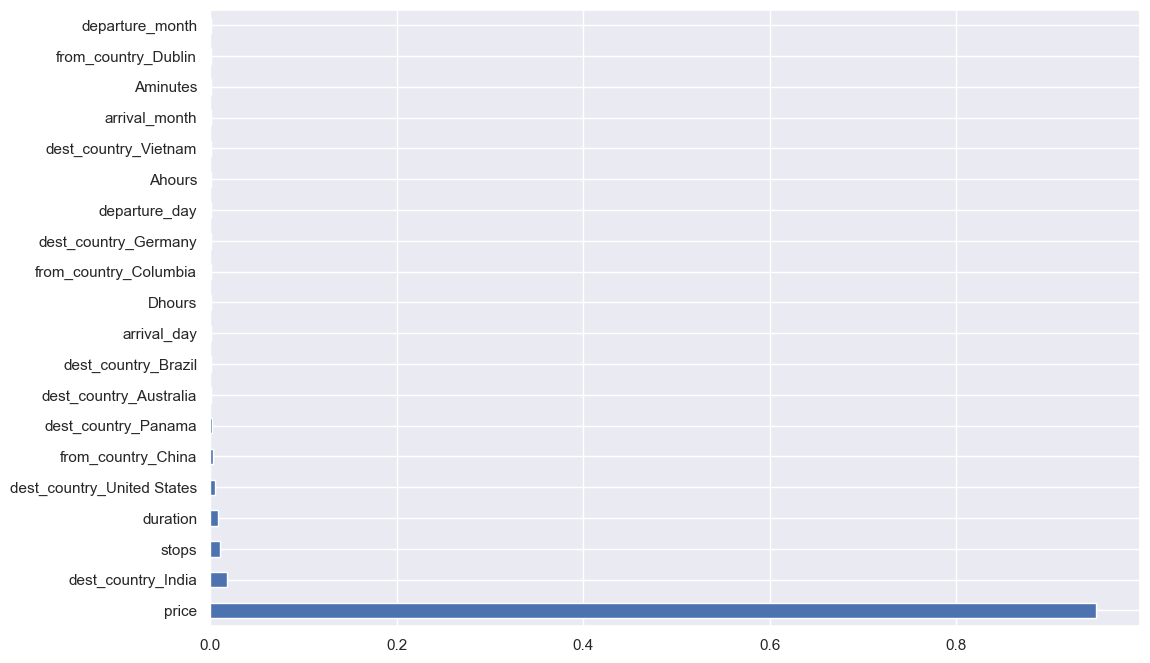

In [67]:
#plot graph of important features
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()
#Graph shows price has the highest importance.

In [68]:
#modeling

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [71]:
#shapes of the data split

In [72]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", y_train.shape)
print("Y_test:", y_test.shape)

X_train: (8863, 51)
X_test: (2216, 51)
Y_train: (8863,)
Y_test: (2216,)


In [73]:
#RandomForestRegressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
y_pred = reg_rf.predict(X_test)

In [76]:
reg_rf.score(X_train, y_train)

0.9999930403814359

In [77]:
reg_rf.score(X_test, y_test)

0.9999761712298934

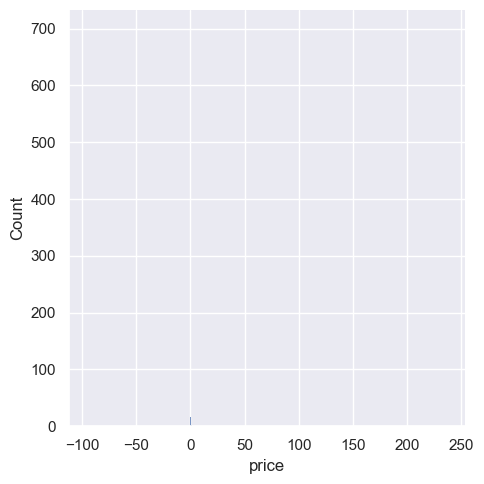

In [78]:
#graph showing predicted prices close to actual prices when the distribution is mostly around 0
#plt.figure(figsize = (8,8))
sns.displot(y_test-y_pred)
plt.show()

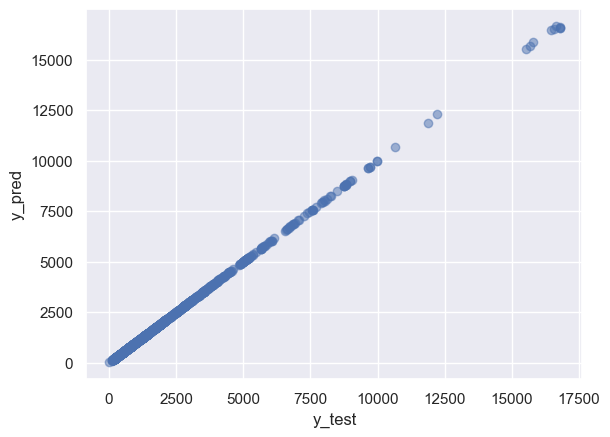

In [79]:
#graph showing line of best fit
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

<Axes: xlabel='price'>

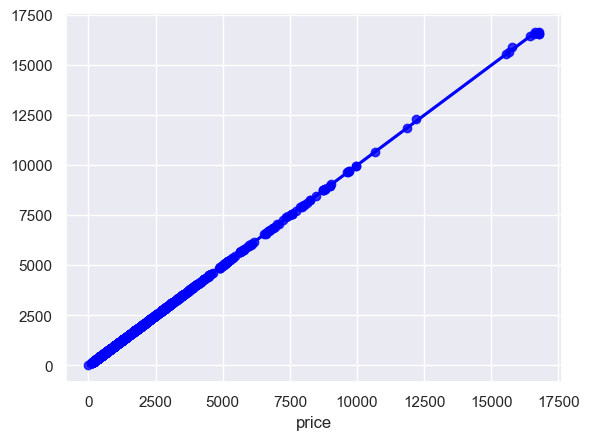

In [80]:
sns.regplot(x=y_test, y=y_pred, ci=None, color= 'blue')

In [81]:
from sklearn import metrics

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.1168366425992828
MSE: 79.52414408844757
RMSE: 8.917631080530724


In [83]:
metrics.r2_score(y_test, y_pred)

0.9999761712298934

In [84]:
print('Model Performance on Training Set:', round(reg_rf.score(X_train, y_train) *100,2))
print('Model Performance on Test Set:', round(reg_rf.score(X_test, y_test) *100,2))

Model Performance on Training Set: 100.0
Model Performance on Test Set: 100.0


In [85]:
#linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [87]:
y_pred = model.predict(X_test)

In [88]:
model.score(X_train, y_train)

1.0

In [89]:
model.score(X_test, y_test)

1.0

In [90]:
print('Model Performance on Training Set:', round(model.score(X_train, y_train) *100,2))
print('Model Performance on Test Set:', round(model.score(X_test, y_test) *100,2))

Model Performance on Training Set: 100.0
Model Performance on Test Set: 100.0


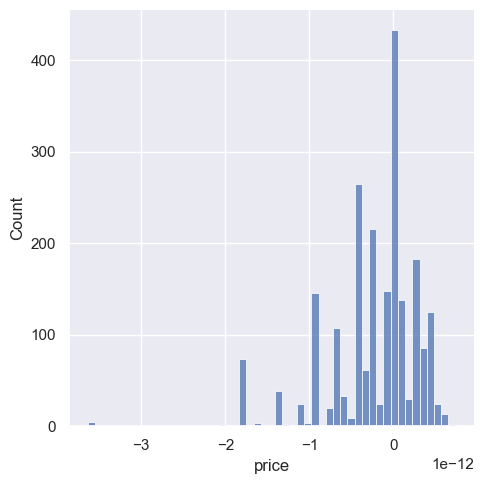

In [91]:
#graph showing predicted prices close to actual prices when the distribution is mostly around 0
#plt.figure(figsize = (8,8))
sns.displot(y_test-y_pred)
plt.show()

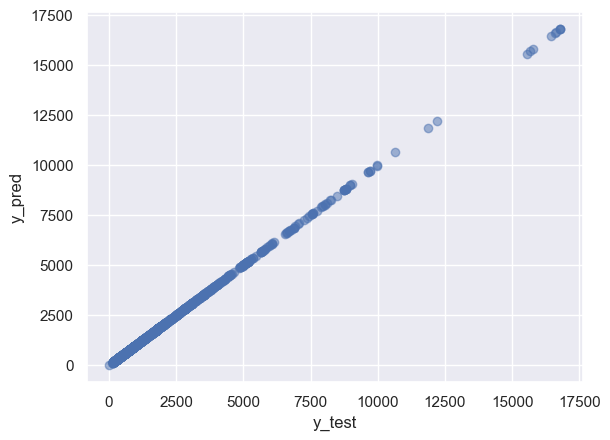

In [92]:
#graph showing line of best fit
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

<Axes: xlabel='price'>

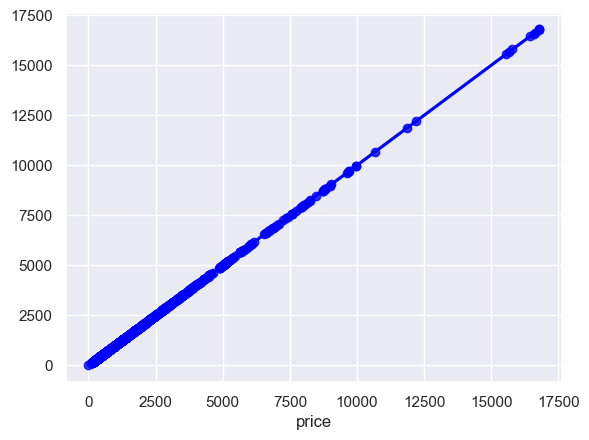

In [93]:
sns.regplot(x=y_test, y=y_pred, ci=None, color= 'blue')

In [94]:
from sklearn import metrics

In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.945875598606199e-13
MSE: 3.484649326929566e-25
RMSE: 5.903091839815442e-13


In [96]:
metrics.r2_score(y_test, y_pred)

1.0

In [97]:
#SAVE MODEL AND REUSE IT AGAIN


#import pickle
#open a file, where you want to store the data

#with open('model_pickle', 'wb') as f:
 #   pickle.dump(model, f)
#file = open('flight2_lr.pkl', 'wb')

#dump information to that file


In [98]:
#with open('model_pickle', 'rb') as f:
 #   mp = pickle.load(f)

#model = open('flight2_lr.pkl', 'rb')
#lr = pickle.load(model)

In [99]:
#y_prediction = mp.predict(X_test)

In [100]:
#metrics.r2_score(y_test, y_prediction)

In [101]:
#logisticregression

In [102]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred = clf.predict(X_test)

In [104]:
clf.score(X_train, y_train)

0.05641430666817105

In [105]:
clf.score(X_test, y_test)

0.05054151624548736

In [106]:
print('Model Performance on Training Set:', round(clf.score(X_train, y_train) *100,2))
print('Model Performance on Test Set:', round(clf.score(X_test, y_test) *100,2))

Model Performance on Training Set: 5.64
Model Performance on Test Set: 5.05


In [107]:
metrics.r2_score(y_test, y_pred)

0.6589506138569444

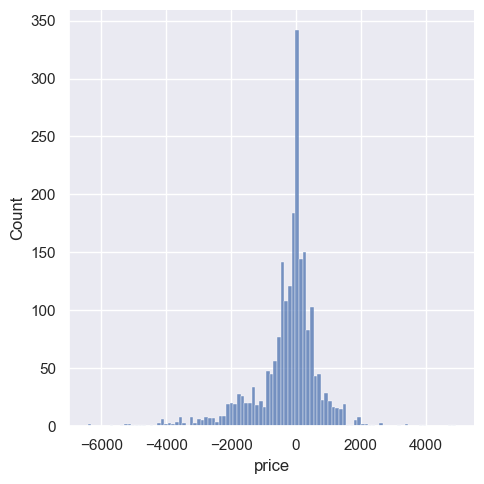

In [108]:
#graph showing predicted prices close to actual prices when the distribution is mostly around 0
#plt.figure(figsize = (8,8))
sns.displot(y_test-y_pred)
plt.show()

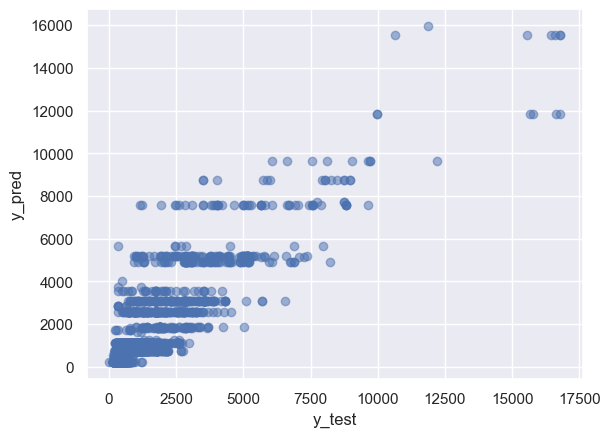

In [109]:
#graph showing line of best fit
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

<Axes: xlabel='price'>

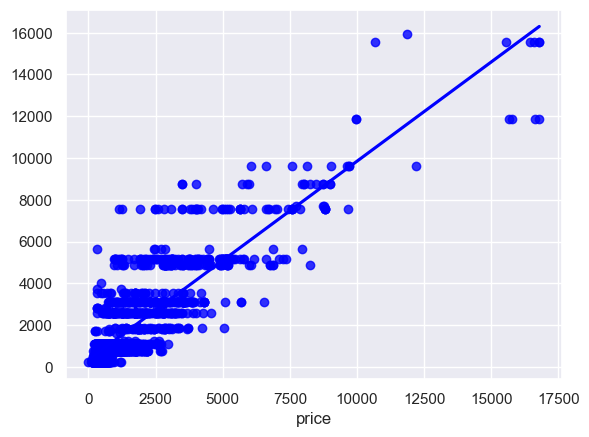

In [110]:
sns.regplot(x=y_test, y=y_pred, ci=None, color= 'blue')

In [111]:
from sklearn import metrics

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 655.3145306859205
MSE: 1138189.6926895308
RMSE: 1066.859734308841


In [ ]:
Hyperparameter Tuning

1. RandomizedSearchCV --> fast 
2. GridSearchCV

.Assignn hyperparameters in form of dictionery
.Fit the model
.Check best parameters


In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
#Randomized Search CV

#Number of trees in Random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num =12)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required  at each leaf node
min_samples_leaf = [1,2,5,10]


In [115]:
#create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [116]:
#Random search of parameters, using 5 folds cross validation,
#Search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [117]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   9.5s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  10.2s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   9.9s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   7.6s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   7.9s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  16.1s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  15.5s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  15.5s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  15.6s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  15.7s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  23.3s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  26.2s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  24.2s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  27.8s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  27.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  27.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  20.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  20.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  22.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  20.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.8s
[CV] END max_depth=5, max_feat

C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  29.9s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  30.1s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  32.0s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  32.3s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  36.1s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [118]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [119]:
prediction = rf_random.predict(X_test)

C:\Users\R\AppData\Local\Temp\ipykernel_6668\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


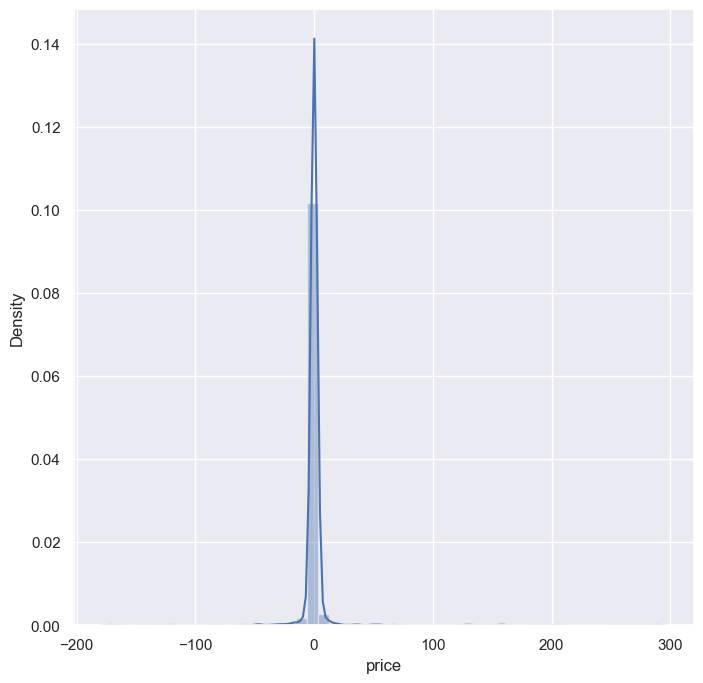

In [120]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

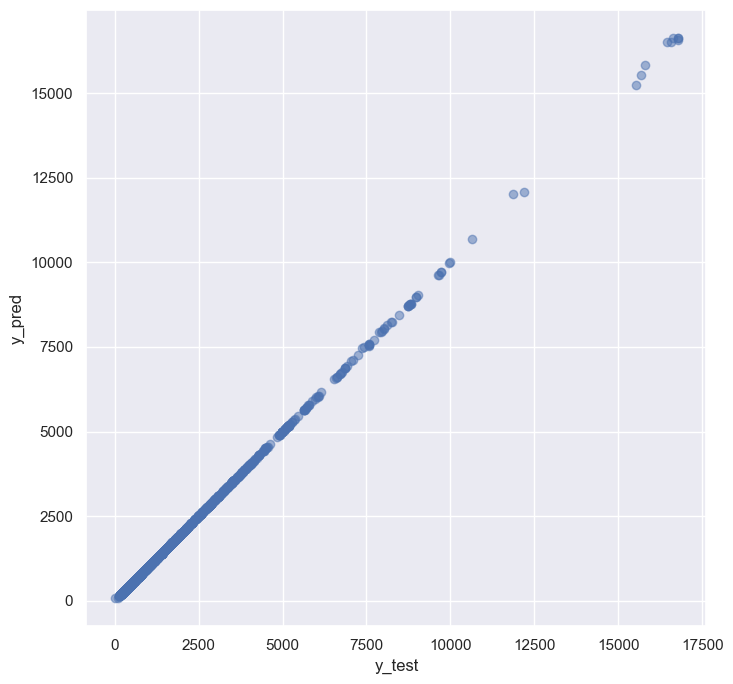

In [121]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.92880767527462
MSE: 140.4070856780127
RMSE: 11.849349588817637


In [123]:
#SAVE MODEL AND REUSE IT AGAIN


import pickle
#open a file, where you want to store the data

file = open('final_flight1_rf.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)

In [124]:
model = open('final_flight1_rf.pkl', 'rb')
forest = pickle.load(model)

In [125]:
y_prediction = forest.predict(X_test)

In [126]:
metrics.r2_score(y_test, y_prediction)

0.9999579281461709